# Reddit Sentiment Data with Historical Price Data Only Model

In [112]:
import pandas as pd

# Load the historical carbon credit data
historical_data = pd.read_csv('final_merged_data.csv')

# Load the Reddit sentiment score data
reddit_data = pd.read_csv('reddit_opinion_cleaned.csv')

# Display the first few rows of each dataset
print("Historical Data Head:")
print(historical_data.head())

print("\nReddit Sentiment Data Head:")
print(reddit_data.head())

Historical Data Head:
         Date    Low   High   Open  DailyChange  Price_MA_7  \
0  2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1  2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2  2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3  2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4  2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  
0                              -10.4                                  6.6  
1                              -10.4                                  6.6 

In [113]:
# Convert the date columns to datetime format
historical_data['Date'] = pd.to_datetime(historical_data['Date'])
reddit_data['Date'] = pd.to_datetime(reddit_data['Date'], dayfirst=True)  # Assuming day-first format for Reddit data

# Display the datasets again to ensure the date formatting is correct
print("Historical Data Head (Date formatted):")
print(historical_data.head())

print("\nReddit Sentiment Data Head (Date formatted):")
print(reddit_data.head())

Historical Data Head (Date formatted):
        Date    Low   High   Open  DailyChange  Price_MA_7  \
0 2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1 2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2 2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3 2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4 2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  
0                              -10.4                                  6.6  
1                              -10.4                           

In [114]:
# Check for missing values in both datasets
print("Missing values in Historical Data:")
print(historical_data.isnull().sum())

print("\nMissing values in Reddit Sentiment Data:")
print(reddit_data.isnull().sum())

Missing values in Historical Data:
Date                                   0
Low                                    0
High                                   0
Open                                   0
DailyChange                            0
Price_MA_7                             0
Price_EUR(Quartly Crude Oil Prices)    0
Inflation_Rates(%)                     0
GDP_Growth_Rate(Annual Average %)      0
Unemployment_Rate(Annual Average %)    0
dtype: int64

Missing values in Reddit Sentiment Data:
score    0
Date     0
dtype: int64


In [115]:
# Aggregate sentiment scores by date
reddit_daily_sentiment = reddit_data.groupby('Date').agg({
    'score': 'mean'  # Calculate the mean score for each day
}).reset_index()

# Display the aggregated dataset
print(reddit_daily_sentiment.head())

        Date     score
0 2020-01-02  2.777778
1 2020-01-03  2.272727
2 2020-01-05  4.666667
3 2020-01-06  3.975000
4 2020-01-07  2.857143


In [116]:
# Merge the datasets on the Date column
merged_data = pd.merge(historical_data, reddit_daily_sentiment, on='Date', how='left')

# Display the merged dataset to ensure correctness
print(merged_data.head())
print(merged_data.isnull().sum())

        Date    Low   High   Open  DailyChange  Price_MA_7  \
0 2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1 2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2 2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3 2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4 2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  \
0                              -10.4                                  6.6   
1                              -10.4                                  6.6   
2                      

In [117]:
# Drop rows with missing values in the merged dataset
merged_data.dropna(inplace=True)

# Verify that there are no more missing values
print(merged_data.isnull().sum())

Date                                   0
Low                                    0
High                                   0
Open                                   0
DailyChange                            0
Price_MA_7                             0
Price_EUR(Quartly Crude Oil Prices)    0
Inflation_Rates(%)                     0
GDP_Growth_Rate(Annual Average %)      0
Unemployment_Rate(Annual Average %)    0
score                                  0
dtype: int64


In [138]:
# Select the features and target for the model
features = ['Open', 'DailyChange', 'Low', 'High', 'score']  # Features from historical and sentiment data
target = 'Price_MA_7'  # Target variable

# Prepare the feature matrix (X) and target vector (y)
X = merged_data[features]
y = merged_data[target]

In [139]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [140]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [141]:
# Import necessary libraries for models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models with standard parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)

# Train the models on the scaled training data
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [142]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared for each model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation results
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")
print(f"Gradient Boosting - Mean Squared Error: {mse_gb:.2f}, R-squared: {r2_gb:.2f}")
print(f"XGBoost - Mean Squared Error: {mse_xgb:.2f}, R-squared: {r2_xgb:.2f}")

Random Forest - Mean Squared Error: 6.50, R-squared: 0.51
Gradient Boosting - Mean Squared Error: 5.80, R-squared: 0.56
XGBoost - Mean Squared Error: 5.84, R-squared: 0.56


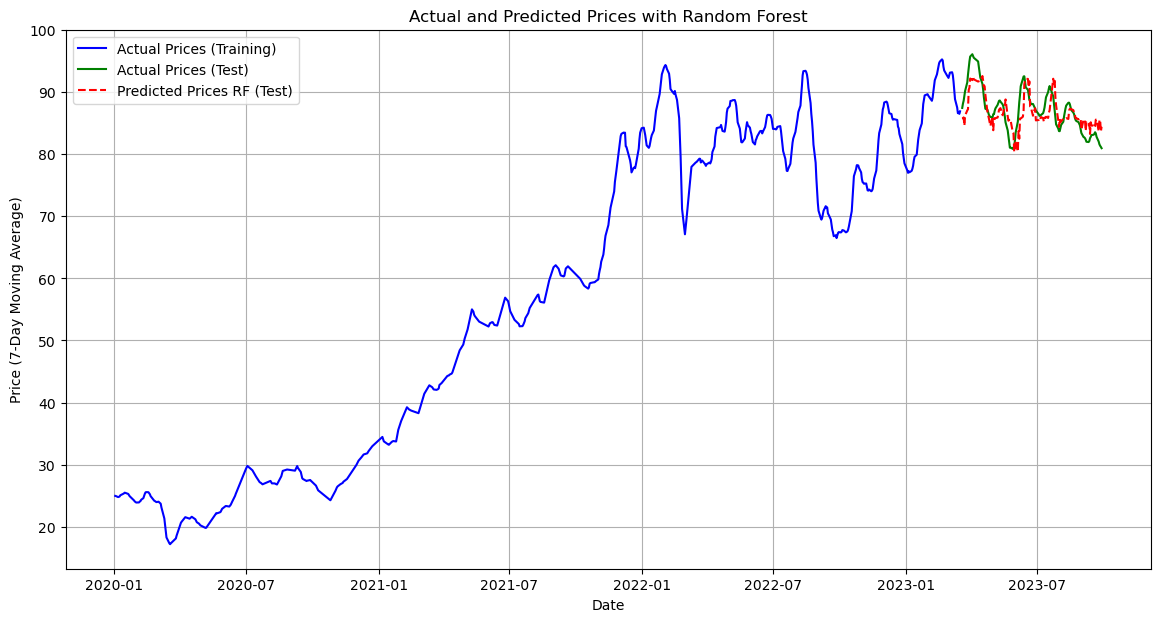

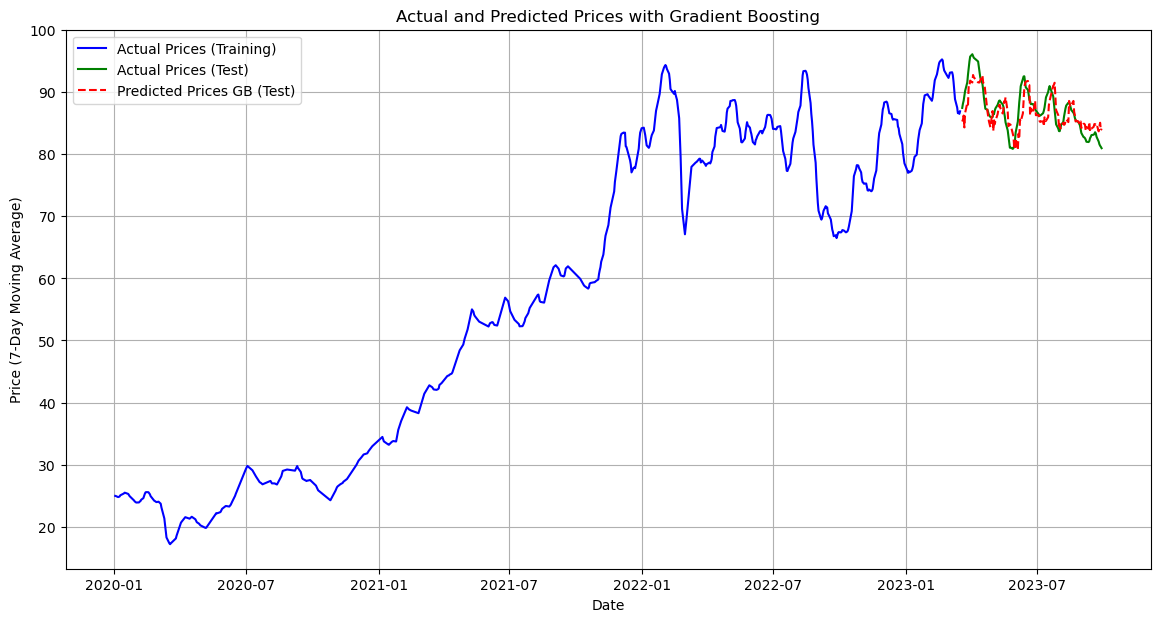

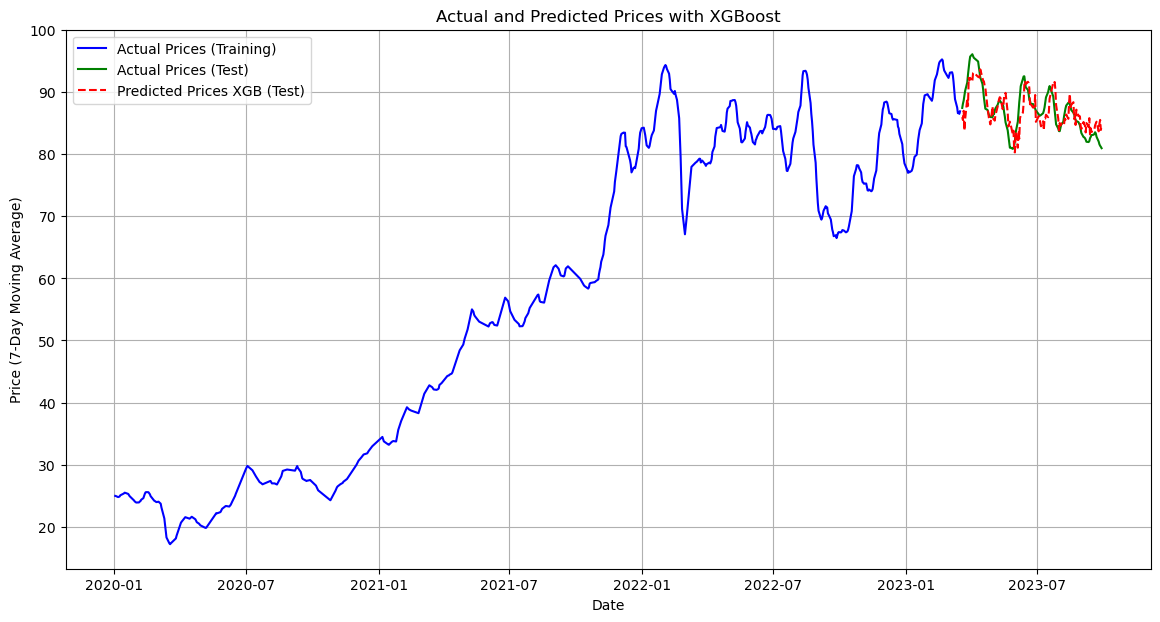

In [143]:
import matplotlib.pyplot as plt

# Plot Random Forest Results
plt.figure(figsize=(14, 7))

# Plot actual prices for the first 80% (training data)
plt.plot(merged_data['Date'][:len(y_train)], y_train, label='Actual Prices (Training)', color='blue', linewidth=1.5)

# Plot actual prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_test, label='Actual Prices (Test)', color='green', linewidth=1.5)

# Plot predicted prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_pred_rf, label='Predicted Prices RF (Test)', color='red', linestyle='--', linewidth=1.5)

plt.title('Actual and Predicted Prices with Random Forest')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Gradient Boosting Results
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'][:len(y_train)], y_train, label='Actual Prices (Training)', color='blue', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train):], y_test, label='Actual Prices (Test)', color='green', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train):], y_pred_gb, label='Predicted Prices GB (Test)', color='red', linestyle='--', linewidth=1.5)
plt.title('Actual and Predicted Prices with Gradient Boosting')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

# Plot XGBoost Results
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'][:len(y_train)], y_train, label='Actual Prices (Training)', color='blue', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train):], y_test, label='Actual Prices (Test)', color='green', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train):], y_pred_xgb, label='Predicted Prices XGB (Test)', color='red', linestyle='--', linewidth=1.5)
plt.title('Actual and Predicted Prices with XGBoost')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

# Reddit Sentiment Data with All Historical Data Model

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and target for the new models
features_model_2 = ['High', 'DailyChange', 'GDP_Growth_Rate(Annual Average %)', 
                    'Inflation_Rates(%)', 'Price_EUR(Quartly Crude Oil Prices)', 
                    'Unemployment_Rate(Annual Average %)', 'score']
target = 'Price_MA_7'

# Split the data into features (X) and target (y)
X_model_2 = merged_data[features_model_2]
y = merged_data[target]

# Split the data into training (80%) and testing (20%) sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y, test_size=0.2, shuffle=False)

# Feature scaling for Model 2
scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2)
X_test_scaled_2 = scaler_2.transform(X_test_2)

In [163]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models with regularization parameters
rf_model_2 = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
gb_model_2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
xgb_model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)

# Train the models for Model 2
rf_model_2.fit(X_train_scaled_2, y_train_2)
gb_model_2.fit(X_train_scaled_2, y_train_2)
xgb_model_2.fit(X_train_scaled_2, y_train_2)

# Predict on the test data
y_pred_rf_2 = rf_model_2.predict(X_test_scaled_2)
y_pred_gb_2 = gb_model_2.predict(X_test_scaled_2)
y_pred_xgb_2 = xgb_model_2.predict(X_test_scaled_2)

In [164]:
# Calculate Mean Squared Error (MSE) and R-squared for each model
mse_rf_2 = mean_squared_error(y_test_2, y_pred_rf_2)
r2_rf_2 = r2_score(y_test_2, y_pred_rf_2)

mse_gb_2 = mean_squared_error(y_test_2, y_pred_gb_2)
r2_gb_2 = r2_score(y_test_2, y_pred_gb_2)

mse_xgb_2 = mean_squared_error(y_test_2, y_pred_xgb_2)
r2_xgb_2 = r2_score(y_test_2, y_pred_xgb_2)

# Print the evaluation results
print(f"Random Forest Model 2 - Mean Squared Error: {mse_rf_2:.2f}, R-squared: {r2_rf_2:.2f}")
print(f"Gradient Boosting Model 2 - Mean Squared Error: {mse_gb_2:.2f}, R-squared: {r2_gb_2:.2f}")
print(f"XGBoost Model 2 - Mean Squared Error: {mse_xgb_2:.2f}, R-squared: {r2_xgb_2:.2f}")

Random Forest Model 2 - Mean Squared Error: 5.01, R-squared: 0.62
Gradient Boosting Model 2 - Mean Squared Error: 4.77, R-squared: 0.64
XGBoost Model 2 - Mean Squared Error: 4.99, R-squared: 0.62


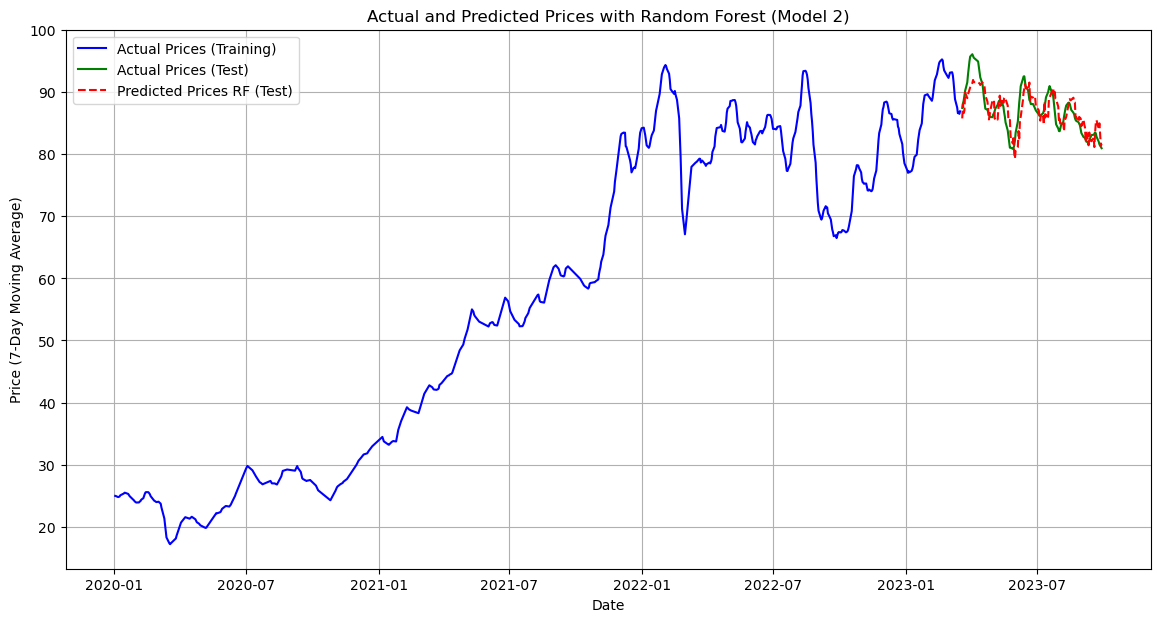

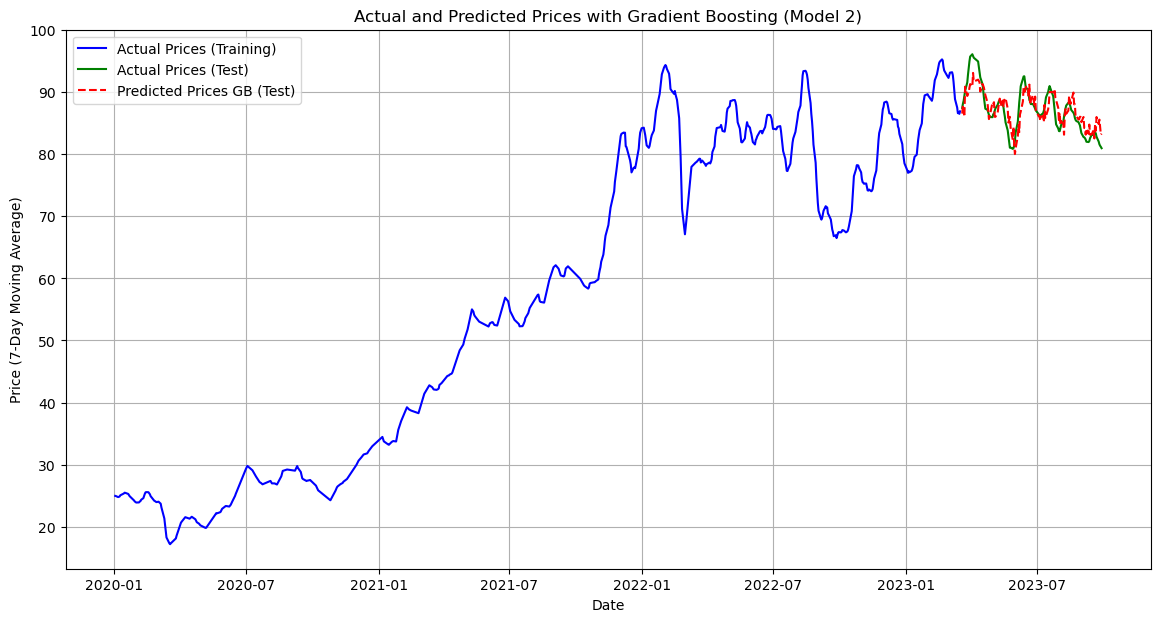

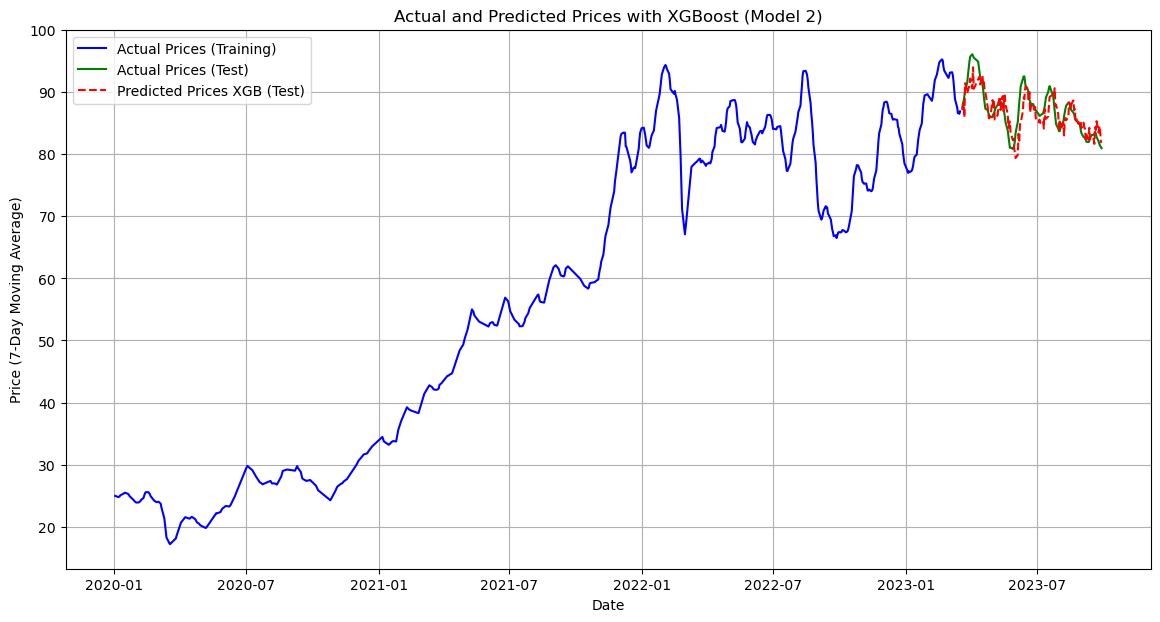

In [165]:
# Plot Random Forest Results
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'][:len(y_train_2)], y_train_2, label='Actual Prices (Training)', color='blue', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train_2):], y_test_2, label='Actual Prices (Test)', color='green', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train_2):], y_pred_rf_2, label='Predicted Prices RF (Test)', color='red', linestyle='--', linewidth=1.5)
plt.title('Actual and Predicted Prices with Random Forest (Model 2)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Gradient Boosting Results
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'][:len(y_train_2)], y_train_2, label='Actual Prices (Training)', color='blue', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train_2):], y_test_2, label='Actual Prices (Test)', color='green', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train_2):], y_pred_gb_2, label='Predicted Prices GB (Test)', color='red', linestyle='--', linewidth=1.5)
plt.title('Actual and Predicted Prices with Gradient Boosting (Model 2)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

# Plot XGBoost Results
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'][:len(y_train_2)], y_train_2, label='Actual Prices (Training)', color='blue', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train_2):], y_test_2, label='Actual Prices (Test)', color='green', linewidth=1.5)
plt.plot(merged_data['Date'][len(y_train_2):], y_pred_xgb_2, label='Predicted Prices XGB (Test)', color='red', linestyle='--', linewidth=1.5)
plt.title('Actual and Predicted Prices with XGBoost (Model 2)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()